In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import set_config
import pickle
from tkinter import *

In [3]:
df_c=pd.read_csv('calories.csv')
df_e=pd.read_csv('exercise.csv')

In [4]:
df_e.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df_c.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
#concatenate two datasets calories and exercice
data=pd.merge(df_e,df_c,on='User_ID')

In [7]:
#First 5  rows of our data
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
#explore data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
#describe data features
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
#check null values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
#verify duplicate values
data.duplicated().sum()

0

In [12]:
#plot graph for numerical and categorical columns
def plot_graph(data):
    num_col=data.select_dtypes(include=np.number).columns
    for column in num_col:
        plt.figure(figsize=(5,3))
        sns.distplot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    cat_col=data.select_dtypes(include='object').columns
    for column in cat_col:
        plt.figure(figsize=(5,3))
        sns.countplot(data[column])
        plt.title(f"Countplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

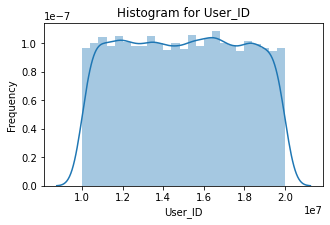

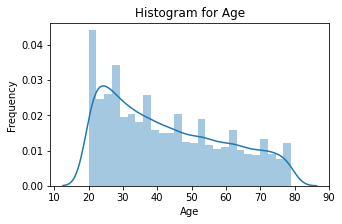

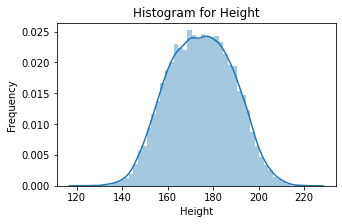

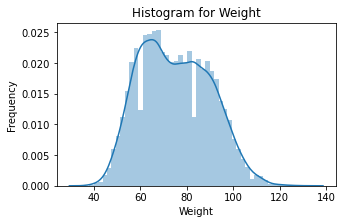

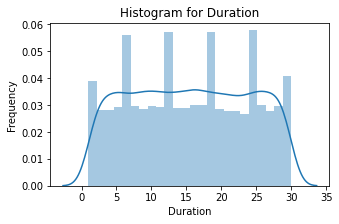

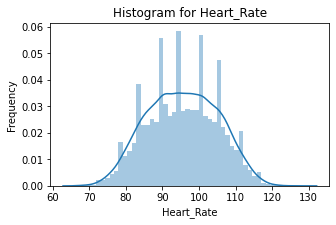

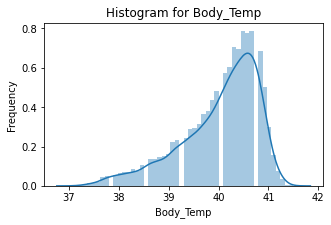

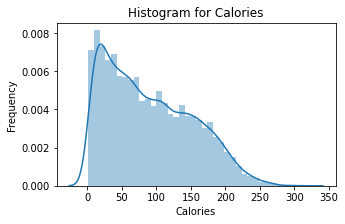

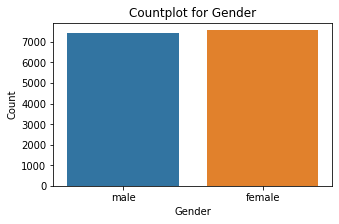

In [13]:
plot_graph(data)

In [14]:
#Split our data on X and y
X=data.drop(columns=['Calories','User_ID'],axis=1)
y=data['Calories']

In [15]:
#create X_train,y_train,X_test,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)


In [16]:
X_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
4741,female,22,182.0,74.0,9.0,85.0,39.8
6160,male,20,194.0,92.0,10.0,92.0,39.7
9466,female,68,164.0,65.0,11.0,97.0,39.7
12802,male,49,193.0,87.0,9.0,85.0,39.8
8391,female,70,167.0,64.0,22.0,97.0,40.4


## Column Transformer

In [17]:
#create ColumnTransformer istance
preprocessor=ColumnTransformer(transformers=[
('Cat',OrdinalEncoder(),['Gender']),
('num',StandardScaler(),['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']),
],remainder='passthrough')

In [18]:
pipe=Pipeline([('preprocessor',preprocessor),
          ("model",LinearRegression())])

In [19]:
set_config(display='diagram')

In [20]:
#visualize our pipeline pipe as a schema
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [21]:
#train our pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [22]:
#predict
y_pred=pipe.predict(X_test)

In [23]:
#calculate metrics
R2=r2_score(y_test,y_pred)
print('score R2',R2)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error',mae)


score R2 0.9645640644517228
mean absolute error 8.556537349005168


## Kfold

In [24]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)


## Cross-Validation

In [25]:
#cross vamidation isntance
cv=cross_val_score(pipe,X,y,cv=kfold,scoring='r2')

In [26]:
cv.mean()

0.9671402283675841

In [27]:
#implement function to train model
def model_score(model_name,model):
    output=[]
    output.append(model_name)
    #create pipeline for data preprocessing and modeling
    pipe= Pipeline([('preprocessor',preprocessor),
                        ("model",model)])
    #split data on train and test
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)
    
    pipe.fit(X_train,y_train)
    
    y_pred=pipe.predict(X_test)
    #evaluate ML model using r2_score
    output.append(r2_score(y_test,y_pred))
    #evaluate ML model using mean_absolute_error
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold=KFold(n_splits=5,shuffle=True,random_state=42)
    cv=cross_val_score(pipe,X,y,cv=kfold,scoring='r2')    
    output.append(cv.mean())
    
    return output

In [28]:
#Create dictionary icnludes LinearRegression, Xgboost,RandomForest
model_dict={
    'LR':LinearRegression(),
    'XGB': XGBRegressor(),
    'RF': RandomForestRegressor()
}

In [29]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_score(model_name,model))

In [30]:
#calculate metrics for each model
model_output

[['LR', 0.9645640644517228, 8.556537349005168, 0.9671402283675841],
 ['XGB', 0.9988545571762693, 1.437071429948012, 0.9987673407571723],
 ['RF', 0.9977525350615899, 1.8441666666666667, 0.997935598203022]]

* Xgboost model is the best powerful model with r2_score=99%

## Train our data with Xgboost 

In [31]:
 pipe= Pipeline([('preprocessor',preprocessor),
                        ("model",XGBRegressor())])

In [32]:
pipe.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, ear...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [33]:
#create an example
sample= pd.DataFrame({
    'Gender': 'male',
    'Age':67,
    'Height':190.0,
    'Weight':90,
    'Duration':29.0,
    'Heart_Rate':100.0,
    'Body_Temp':40.0,
},index=[0])

In [34]:
pipe.predict(sample)

array([203.00496], dtype=float32)

In [35]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipe,f)

In [36]:
with open('pipeline.pkl','rb') as f:
    pipe_saved=pickle.load(f)

In [49]:

def show_entry():
    with open ('pipeline.pkl','rb') as f:
        pipe=pickle.load(f)
        
    p1= str(clicked.get())
    p2= float(e2.get())
    p3= float(e3.get())
    p4= float(e4.get())
    p5= float(e5.get())
    p6= float(e6.get())    
    p7= float(e7.get())    
    
    sample= pd.DataFrame({
    'Gender': [p1],
    'Age':[p2],
    'Height':[p3],
    'Weight':[p4],
    'Duration':[p5],
    'Heart_Rate':[p6],
    'Body_Temp':[p7],
},index=[0])
    
    result=pipe.predict(sample)
    print(result)
    Label(main,text="Amount ofcalories Burnt").grid(row=13)
    Label(main,text=result[0]).grid(row=14)
    
main=Tk()
main.title("Calories Burnt Prediction ")
label= Label(main,text="Calories Burnt ", bg="Black",
            fg="white").grid(row=0,columnspan=2)

Label(main,text="Select your gender").grid(row=1)
Label(main,text="Select your Age").grid(row=2)
Label(main,text="Enter your height").grid(row=3)
Label(main,text="Enter your Weight").grid(row=4)
Label(main,text="Exercice Duration").grid(row=5)
Label(main,text="Heart Rate").grid(row=6)
Label(main,text="Body Temperature").grid(row=7)

clicked=StringVar()
options= ['male','female']

e1=OptionMenu(main,clicked,*options)

e1.configure(width=15)
e2=Entry(main)
e3=Entry(main)
e4=Entry(main)
e5=Entry(main)
e6=Entry(main)
e7=Entry(main)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)

Button(main,text='predict',command=show_entry).grid()

mainloop()

[138.76082]
